# Разработка A/B-тестирования и анализ результатов




### Цель проекта

Компания разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. 

**Цель:** рассчитать параметры A/B-теста, который позволит проверить гипотезу о том, что новый алгоритм увеличит интерес пользователей.

### Содержание проекта

1. Работа с историческими данными (EDA)
    - 1.1. Загрузка исторических данных
    - 1.2. Знакомство с данными
    - 1.3. Анализ числа регистраций
    - 1.4. Анализ числа просмотренных страниц
    - 1.5. Доля пользователей, просмотревших более четырёх страниц
>
2. Подготовка к тесту
    - 2.1. Формулировка нулевой и альтернативной гипотез
    - 2.2. Расчёт размера выборки
    - 2.3. Расчёт длительности A/B-теста
>
3. Мониторинг А/В-теста
    - 3.1. Проверка распределения пользователей
    - 3.2. Проверка пересечений пользователей
    - 3.3. Равномерность разделения пользователей по устройствам
    - 3.4. Равномерность распределения пользователей по регионам
    - 3.5. Вывод после проверки A/B-теста
>
4. Проверка результатов A/B-теста
    - 4.1. Получение результатов теста и подсчёт основной метрики
    - 4.2. Проверка корректности результатов теста
    - 4.3. Сравнение доли успешных сессий
    - 4.4. Насколько статистически значимо изменение ключевой метрики
    - 4.5. Вывод по результатам A/B-эксперимента

---


### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных

Импортируем необходимые для работы библиотеки pandas, matplotlib, scipy.stats и math. Создадим датафрейм `sessions_history` и ознакомимся с его содержанием.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import math as m

In [2]:
sessions_history = pd.read_csv('sessions_project_history.csv')

In [3]:
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


---

#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитаем количество уникальных сессий `session_id`.

- Выведем на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. 


In [4]:
session_grouped = sessions_history.groupby('user_id', observed=True).agg({
    'session_id':'count'
}).sort_values('session_id', ascending=False).reset_index()
session_grouped

,user_id,session_id
0,10E0DEFC1ABDBBE0,10
1,6A73CB5566BB494D,10
2,8A60431A825D035B,9
3,D11541BAC141FB94,9
4,5BCFE7C4DCC148E9,9
...,...,...
134034,1DF13BB1953B3497,1
134035,628502A3CE7E0A3C,1
134036,1DEEF40DEFBD0C65,1
134037,AC08479B7472C628,1


In [5]:
sessions_history[sessions_history['user_id'] == '10E0DEFC1ABDBBE0']

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


---

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируем, как менялось число регистраций в приложении за время его существования.

- Агрегируем исторические данные и рассчитаем число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты будем считать, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.
- Построим линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразим их на одном графике.
- Рассчитаем долю зарегистрированных пользователей от всех пользователей по дням и построим линейный график .

In [6]:
users = sessions_history.groupby('session_date', observed=True).agg({
    'user_id':'nunique', 
    'registration_flag':'sum' 
}).sort_values('session_date', ascending = True).reset_index()
users

,session_date,user_id,registration_flag
0,2025-08-11,3919,169
1,2025-08-12,6056,336
2,2025-08-13,8489,464
3,2025-08-14,10321,625
4,2025-08-15,14065,840
5,2025-08-16,12205,916
6,2025-08-17,11200,833
7,2025-08-18,10839,860
8,2025-08-19,12118,831
9,2025-08-20,13514,1008


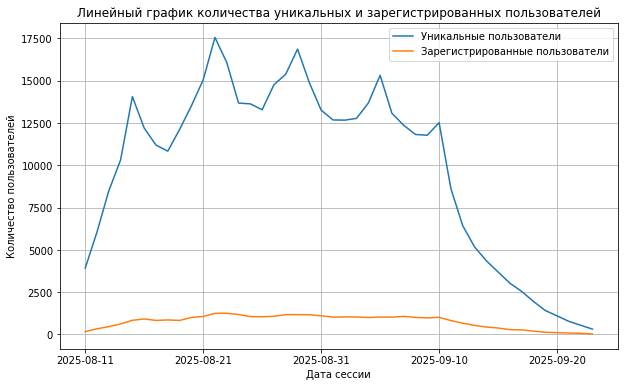

In [7]:
users.plot.line(
    x='session_date', 
    y=['user_id', 'registration_flag'], 
    grid=True, 
    figsize=(10, 6)
)

plt.title('Линейный график количества уникальных и зарегистрированных пользователей')
plt.xlabel('Дата сессии')
plt.ylabel('Количество пользователей')
plt.legend(labels=['Уникальные пользователи', 'Зарегистрированные пользователи'], loc='upper right')
plt.show()

- Число пользователей значительно увеличилось за первые пять дней (до 14 065 пользователей по состоянию на 15.08.2025), затем их количество было нестабильно, но цифры колебались на высоких показателях (максимум - 17 563 пользователей был достигнут 22.08.2025). После 10 сентября количество пользователей постепенно снижалось, 23.09.2025 оно составило 317 пользователей.
- Аналогичный тренд наблюдался среди зарегистрированных пользователей в рассматриваемый промежуток времени. Т.к. зарегистрированные пользователи не составляют значительную долю от всех пользователей, на графике менее заметны колебания.

In [8]:
users['users_share'] = users['registration_flag']/users['user_id']*100
users

,session_date,user_id,registration_flag,users_share
0,2025-08-11,3919,169,4.312325
1,2025-08-12,6056,336,5.548217
2,2025-08-13,8489,464,5.465897
3,2025-08-14,10321,625,6.055615
4,2025-08-15,14065,840,5.972272
5,2025-08-16,12205,916,7.505121
6,2025-08-17,11200,833,7.437500
7,2025-08-18,10839,860,7.934311
8,2025-08-19,12118,831,6.857567
9,2025-08-20,13514,1008,7.458931


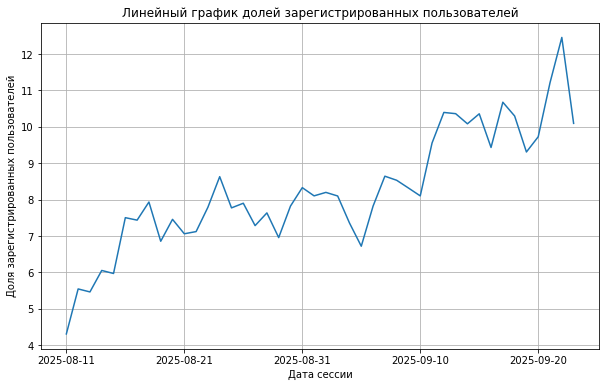

In [9]:
users.plot(
    kind='line',
    x='session_date',
    y='users_share',
    legend=False,
    figsize=(10, 6)
)

plt.title('Линейный график долей зарегистрированных пользователей')
plt.xlabel('Дата сессии')
plt.ylabel('Доля зарегистрированных пользователей')
plt.grid()
plt.show()

- Несмотря на то, что в абсолютных значениях количество пользователей сократилось за рассматриваемый временной промежуток, относительные значения (доля зарегистрированных пользователей от всех пользователей) продемонстрировали тренд на увеличение.

---

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы, что он зарегистрируется и оплатит подписку.

- Найдем количество сессий для каждого значения количества просмотренных страниц. 

- Построим столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

In [10]:
pages = sessions_history.groupby('page_counter', observed=True).agg({
    'session_id': 'count'}
).sort_values('page_counter', ascending = True).reset_index()
pages

,page_counter,session_id
0,1,29160
1,2,105536
2,3,166690
3,4,105569
4,5,26288
5,6,2589
6,7,92


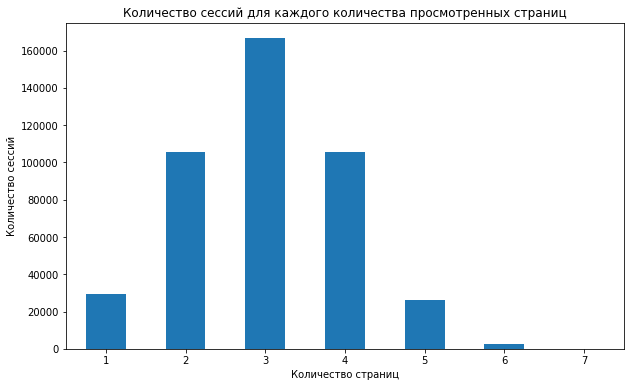

In [11]:
pages.plot.bar(
    x='page_counter', 
    y='session_id', 
    legend=False, 
    figsize=(10, 6)
)

plt.title('Количество сессий для каждого количества просмотренных страниц')
plt.xlabel('Количество страниц')
plt.ylabel('Количество сессий')
plt.xticks(rotation=0)
plt.show()

- **3 страницы** были просмотрены максимальным количеством пользователей (166 690);
- **2 и 4 страницы** характеризуются приблизительно одинаковым распределением пользователей (105 536 и 105 569 страниц соответственно);
- минимальное количество пользователей (92) просмотрели **7 страниц** .

---

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создадим дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Построим график со средним значением доли успешных сессий от всех сессий по дням за весь период наблюдения.

In [12]:
def categorize_pages(row):
    if row['page_counter'] >= 4:
        return 1
    else:
        return 0

sessions_history['good_session'] = sessions_history.apply(categorize_pages, axis=1)
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,good_session
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone,0
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android,1
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC,1
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android,1
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android,0


In [13]:
success_share = sessions_history.groupby('session_date', observed=True).agg({
    'good_session': 'mean'
}).sort_values('session_date', ascending=True).reset_index()

success_share.rename(columns={'good_session': 'success_rate'}, inplace=True) 
success_share

,session_date,success_rate
0,2025-08-11,0.312835
1,2025-08-12,0.302015
2,2025-08-13,0.306750
3,2025-08-14,0.316055
4,2025-08-15,0.304941
5,2025-08-16,0.306186
6,2025-08-17,0.317589
7,2025-08-18,0.310545
8,2025-08-19,0.312840
9,2025-08-20,0.306941


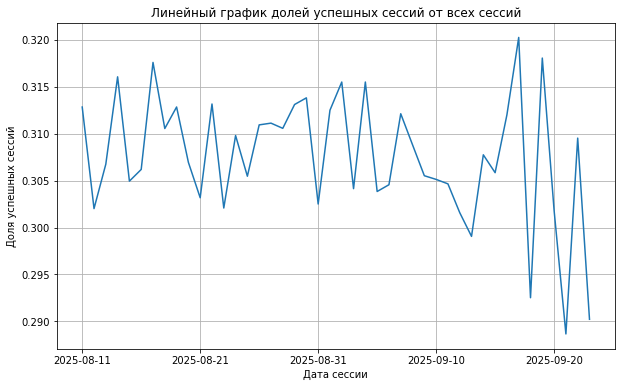

In [14]:
success_share.plot(
    kind='line',
    x='session_date',
    y='success_rate',
    legend=False,
    figsize=(10, 6)
)

plt.title('Линейный график долей успешных сессий от всех сессий')
plt.xlabel('Дата сессии')
plt.ylabel('Доля успешных сессий')
plt.grid()
plt.show()

График долей успешных сессий показывает, что их распределение по дням является равномерным, колебания происходят, в основном, в пределах 29%-31%. Есть отдельные дни, когда показатель выше 32% и ниже 29%.

---



### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Сформулировать нулевую и альтернативную гипотезы

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика рассчитать необходимую длительность проведения теста.

#### 2.1. Формулировка нулевой и альтернативной гипотез


Сформулируем нулевую и альтернативную гипотезы:

**- Нулевая гипотеза (H0):** Доля успешных сессий (т.е. просмотр 4 и более страниц за одну сессию) не увеличится при внедрении нового алгоритма рекомендаций, который, по мнению разработчиков, будет показывать более интересный контент для каждого пользователя.

**- Альтернативная гипотеза (H1):**  Доля успешных сессий увеличится при внедрении нового алгоритма рекомендаций, который, по мнению разработчиков, будет показывать более интересный контент для каждого пользователя.

---

#### 2.2. Расчёт размера выборки

Рассчитаем необходимое количество пользователей для проведения эксперимента, используя метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.


Установим в коде следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%.

In [15]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

alpha = 0.05 
beta = 0.2  
power = 0.8  
p = 0.3 
mde = 0.03 * p  
effect_size = proportion_effectsize(p, p + mde)

power_analysis = NormalIndPower()

sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 41040


---

#### 2.3. Расчёт длительности A/B-теста

Используем данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитаем длительность теста, разделив одно на другое.

- Рассчитаем среднее количество уникальных пользователей приложения в день.

- Определим длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлим в большую сторону.

In [16]:
from math import ceil

avg_daily_users = sessions_history.groupby('session_date', observed=True).agg({
    'user_id': 'nunique'
}).sort_values('session_date', ascending=True).reset_index()

total_avg_daily_users = avg_daily_users['user_id'].mean()

test_duration = ceil(sample_size/(total_avg_daily_users/2))

print(f"Рассчитанная длительность A/B-теста при текущем уровне трафика в {total_avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровне трафика в 9907.363636363636 пользователей в день составит 9 дней


---

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие метрики корректно считаются.

- Считаем и сохраним в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитаем количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитаем и выведем на экран процентную разницу в количестве пользователей в группах A и B. 

Для расчёта процентной разницы воспользуемся формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [17]:
sessions_test_part = pd.read_csv('sessions_project_test_part.csv')  

In [18]:
sessions_test_part.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


In [19]:
users_test = sessions_test_part.pivot_table(
    values='user_id', 
    index='session_date', 
    columns='test_group', 
    aggfunc='nunique'
)
users_test

test_group,A,B
session_date,,
2025-10-14,1477,1466


In [20]:
A = users_test['A']
B = users_test['B']
100*(abs(A-B))/A

session_date
2025-10-14    0.744753
dtype: float64

- Процентная разница  в количестве уникальных пользователей в группах А и В составляет менее 1 процента.

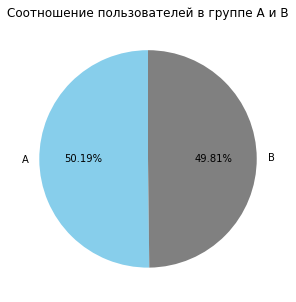

In [21]:
group_totals = users_test.sum()

group_totals.plot(
    kind='pie',
    title='Соотношение пользователей в группе А и В',
    autopct='%.2f%%',
    ylabel='',
    colors=['skyblue', 'grey'],
    figsize=(5, 5),
    startangle=90 
)

plt.show()

- Расхожение в количестве пользователей незначительное, можно им пренебречь. Но стоит проверить, не попали ли пользователи группы А в группу В.

---

#### 3.2. Проверка пересечений пользователей


- Рассчитаем количество пользователей, которые встречаются одновременно в группах A и B, или убедимся, что таких нет.

In [22]:
group_a = sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id']
group_b = sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id']

intersection = list(set(group_a) & set(group_b))
print(intersection)

[]


- Проверка показала, что пересечения пользователей в группах А и В нет.

---

#### 3.3. Равномерность разделения пользователей по устройствам
Проверим, равномерно ли распределены пользователи по категориальной переменной "тип устройств":

- сгруппируем данные по тестовым группам и типам устройств, рассчитаем общее количество уникальных пользователей в каждой группе и вычислим их доли;
- построим две диаграммы:
    - доля каждого типа устройства для пользователей из группы A,
    - доля каждого типа устройства для пользователей из группы B.

In [23]:
device_counts = sessions_test_part.groupby(['test_group', 'device'])['user_id'].nunique()
device_totals = device_counts.groupby('test_group').sum()
device_shares = device_counts / device_totals
display(device_shares)

test_group  device 
A           Android    0.444144
            Mac        0.105619
            PC         0.249831
            iPhone     0.200406
B           Android    0.455662
            Mac        0.100955
            PC         0.259891
            iPhone     0.183492
Name: user_id, dtype: float64

In [24]:
barplot_a_device = device_shares[device_shares.index.get_level_values('test_group') == 'A']
barplot_b_device = device_shares[device_shares.index.get_level_values('test_group') == 'B']
display(barplot_a_device)
display(barplot_b_device)

test_group  device 
A           Android    0.444144
            Mac        0.105619
            PC         0.249831
            iPhone     0.200406
Name: user_id, dtype: float64

test_group  device 
B           Android    0.455662
            Mac        0.100955
            PC         0.259891
            iPhone     0.183492
Name: user_id, dtype: float64

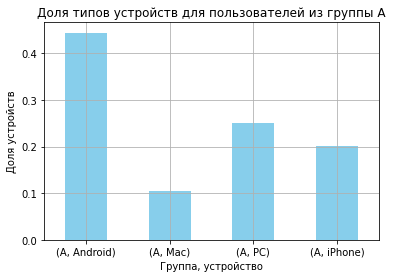

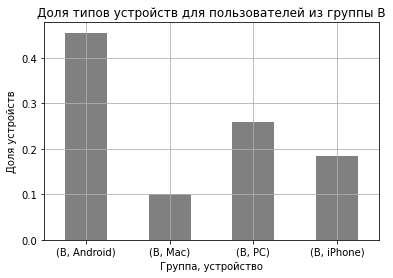

In [25]:
barplot_a_device.plot.bar(
    x='device', 
    y='device_shares', 
    color='skyblue', 
    grid=True
)
plt.title('Доля типов устройств для пользователей из группы А')
plt.xlabel('Группа, устройство')
plt.ylabel('Доля устройств')
plt.xticks(rotation=0)
plt.show()

barplot_b_device.plot.bar(
    x='device', 
    y='device_shares', 
    color='grey', 
    grid=True
)

plt.title('Доля типов устройств для пользователей из группы B')
plt.xlabel('Группа, устройство')
plt.ylabel('Доля устройств')
plt.xticks(rotation=0)
plt.show()

Столбчатые диаграммы для пользователей групп A и B показывают, что **распределение устройств в группах незначительно отличается:**
- разница между пользователями Mac составляет 0.46%,
- разница между пользователями Android составляет 1.16%,
- разница между пользователями iPhone составляет 1.69%,
- разница между пользователями PC составляет 1.01%.

---

#### 3.4. Равномерность распределения пользователей по регионам

Проверим равномерность распределения пользователей по категориальной переменной "регионы":

- сгруппируем данные по тестовым группам и регионам, рассчитаем общее количество уникальных пользователей в каждой группе и вычислим их доли;
- построим две диаграммы:
    - доля каждого региона для пользователей из группы A,
    - доля каждого региона для пользователей из группы B.

In [26]:
region_counts = sessions_test_part.groupby(['test_group', 'region'])['user_id'].nunique()
region_totals = device_counts.groupby('test_group').sum()
region_shares = region_counts / region_totals
display(region_shares)

test_group  region
A           CIS       0.436019
            EU        0.151659
            MENA      0.412322
B           CIS       0.439973
            EU        0.148022
            MENA      0.412005
Name: user_id, dtype: float64

- Выделим данные о доле регионов для группы А и для группы В
- Построим круговую диаграмму с долями распределения устройств в группе А

In [39]:
barplot_a_region = region_shares[region_shares.index.get_level_values('test_group') == 'A']
barplot_b_region = region_shares[region_shares.index.get_level_values('test_group') == 'B']
display(barplot_a_region)
display(barplot_b_region)

test_group  region
A           CIS       0.436019
            EU        0.151659
            MENA      0.412322
Name: user_id, dtype: float64

test_group  region
B           CIS       0.439973
            EU        0.148022
            MENA      0.412005
Name: user_id, dtype: float64

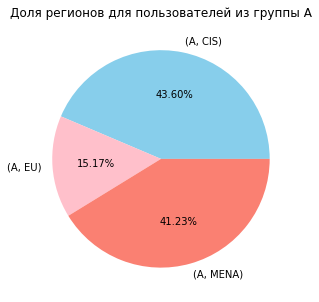

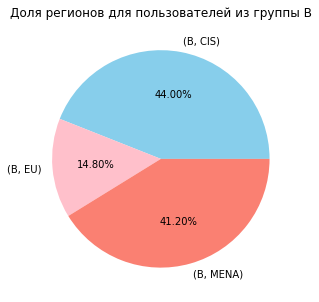

In [41]:
barplot_a_region.plot(
    kind='pie', 
    title='Доля регионов для пользователей из группы А',
    ylabel='',
    colors=['skyblue', 'pink', 'salmon'],
    autopct='%.2f%%',
    figsize=(5,5)
)

plt.show()

barplot_b_region.plot(
    kind='pie', 
    title='Доля регионов для пользователей из группы B',
    ylabel='',
    colors=['skyblue', 'pink', 'salmon'],
    autopct='%.2f%%',
    figsize=(5,5)
)
plt.show()

Круговые диаграммы для пользователей групп A и B показывают, что **распределение пользователей в регионах незначительно отличается:**
- разница между пользователями в регионе CIS составляет 0.4%,
- разница между пользователями в регионе EU составляет 0.37%,
- разница между пользователями в регионе MENA составляет 0.03%.

---

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста можно сделать следующие выводы:

- Для проведения A/B-теста были отобраны 2 группы пользователей:
   - группа А - 1477 уникальных пользователей;
   - группа В - 1466 уникальных пользователей.
   
    Разница в количестве пользователей в двух группах незначительна, она составляет менее 1 процента - 0.74%.


- Пересечение пользователей из тестовой и контрольной групп при проверке обнаружено не было. Следовательно, выборки являются независимыми. 


- При проверке распределение пользователей тестовой и контрольной групп по категориальным переменным были выявлены незначительные расхождения:
   
    - **по типам устройств:**
        - разница между пользователями Mac составляет 0.46%,
        - разница между пользователями Android составляет 1.16%,
        - разница между пользователями iPhone составляет 1.69%,
        - разница между пользователями PC составляет 1.01%.
    
    - **по регионам:**
        - разница между пользователями в регионе CIS составляет 0.4%,
        - разница между пользователями в регионе EU составляет 0.37%,
        - разница между пользователями в регионе MENA составляет 0.03%.
    
**Заключение:** A/B-тест проходит корректно.

---



###  4. Проверка результатов A/B-теста

A/B-тест завершён, и есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считаем и сохраним в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создадим дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [43]:
sessions_test = pd.read_csv('sessions_project_test.csv')
sessions_test.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B


In [44]:
def categorize_pages(row):
    if row['page_counter'] >= 4:
        return 1
    else:
        return 0

sessions_test['good_session'] = sessions_test.apply(categorize_pages, axis=1)
sessions_test.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0


---

#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и будем сравнивать две сопоставимые группы.

- Рассчитаем количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверим, что количество уникальных дневных сессий в двух выборках не различается или различия не являются статистически значимыми. Используем статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

In [45]:
sessions_test_unique = sessions_test.groupby(['session_date', 'test_group']).agg({
    'session_id': 'nunique'
}).sort_values('session_date', ascending=True).reset_index()

sessions_test_unique

,session_date,test_group,session_id
0,2025-10-14,A,1502
1,2025-10-14,B,1628
2,2025-10-15,A,2235
3,2025-10-15,B,2283
4,2025-10-16,A,3280
5,2025-10-16,B,3241
6,2025-10-17,A,4089
7,2025-10-17,B,4054
8,2025-10-18,B,5059
9,2025-10-18,A,5013


In [46]:
unique_sessions_a_b = sessions_test.groupby('test_group').session_id.nunique()
unique_sessions_a_b

test_group
A    49551
B    50454
Name: session_id, dtype: int64

In [47]:
from scipy.stats import ttest_ind

sample_a = sessions_test_unique[sessions_test_unique['test_group'] == 'A']['session_id']
sample_b = sessions_test_unique[sessions_test_unique['test_group'] == 'B']['session_id']

test_result = ttest_ind(
    sample_a,
    sample_b,
    alternative='less' 
)

alpha = 0.05

if test_result.pvalue > alpha:
    print(f'pvalue = {test_result.pvalue} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')
else: 
    print(f'pvalue = {test_result.pvalue} < {alpha}')
    print('Отвергаем нулевую гипотезу')

pvalue = 0.469109652429558 > 0.05
Не получилось отвергнуть нулевую гипотезу


В выборке А было 49 551 уникальных сессий, в выборке В - 50 454.
Тест Стьюдента показал, что различие между количеством сессий в двух выборках не является статистически значимым (pvalue = 0.47 > 0.05), следовательно, не оказывает влияние на результат теста. 

---

#### 4.3. Сравнение доли успешных сессий

Рассчитаем доли успешных сессий для выборок А и В и разницу между этими долями

In [35]:
share_success_test = sessions_test.groupby('test_group').agg({
    'good_session': 'mean'}).reset_index()
share_success_test

,test_group,good_session
0,A,0.307723
1,B,0.318290


In [48]:
group_a = share_success_test[share_success_test['test_group'] == 'A']
group_b = share_success_test[share_success_test['test_group'] == 'B']
display(group_a, group_b)

groups_dif = 100*(group_b['good_session'].mean() - group_a['good_session'].mean())
groups_dif

,test_group,good_session
0,A,0.307723


,test_group,good_session
1,B,0.31829


1.0566571724179463

Доля успешных сессий в тестовой выборке В на 1.06 процентных пунктов выше, чем в контрольной выборке А.

---

#### 4.4. Насколько статистически значимо изменение ключевой метрики

- Проверим, выполняется ли предпосылка Z-теста пропорций о достаточном размере выборок (рассчитаем размер выборок и количество случаев успехов в группе А и в группе В).
- Используя статистический тест, рассчитаем, является ли изменение в метрике доли успешных сессий статистически значимым.

In [49]:
n_a, n_b = sessions_test[sessions_test.test_group == 'A'].shape[0], sessions_test[sessions_test.test_group == 'B'].shape[0]

m_a = sessions_test[(sessions_test.test_group == 'A')&(sessions_test.good_session==1)].shape[0]            
m_b = sessions_test[(sessions_test.test_group == 'B')&(sessions_test.good_session==1)].shape[0]             

p_a, p_b = m_a/n_a, m_b/n_b

print(f'n_a={n_a}, n_b={n_b}')
# 49551 50454
                    
print(f'm_a={m_a}, m_b={m_b}')
print(f'p_a={p_a}, p_b={p_b}')
                    
if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

n_a=49551, n_b=50454
m_a=15248, m_b=16059
p_a=0.3077233557344958, p_b=0.31828992745867524
Предпосылка о достаточном количестве данных выполняется!


In [50]:
from statsmodels.stats.proportion import proportions_ztest

n_a, n_b # 49551, 50454
m_a, m_b # 15248, 16059

alpha = 0.05

stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b ],
    [n_a, n_b ],
    alternative='smaller'
)

if p_value_ztest > alpha:
    print(f'pvalue = {p_value_ztest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение')
else:
    print(f'pvalue = {p_value_ztest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения')

pvalue = 0.0001574739988036123 < 0.05
Нулевая гипотеза не находит подтверждения


Результаты Z-теста показали, что нулевая гипотеза не находит подтверждения. Т.е. **увеличение доли успешных сессий при внедрении нового алгоритма рекомендаций**, который показывает более интересный контент для каждого пользователя, **является статистически значимым**. Предположение разработчиков является верным.

---

#### 4.5. Вывод по результатам A/B-эксперимента

- В ходе A/B эксперимента была проверена гипотеза о том, что при внедрении нового алгоритма рекомендаций, который, по мнению разработчиков, будет показывать более интересный контент для каждого пользователя, доля успешных сессий (т.е. просмотр 4 и более страниц за одну сессию) не увеличится.
    Были проанализированы 2 выборки пользователей: в выборке А было 49 551 уникальных сессий (контрольная выборка), в выборке В - 50 454 (тестовая выборка).
    Тест Стьюдента показал, что различие между количеством сессий в двух выборках не является статистически значимым (pvalue = 0.47 > 0.05), следовательно, не оказывает влияние на результат теста. 
    Тест длился 20 дней с 2025-10-14 по 2025-11-02. 

- Внедрение нового алгоритма рекомендаций привело к росту ключевой метрики (доля успешных сессий) на 1.06 процентных пунктов в тестовой группе В (31.83) по сравнению с контрольной группой А (30.77).

- В итоге проведения Z-теста пропорций для оценки статистической значимости выявленного эффекта было получено значение p-value = 0.0001574739988036123 < 0.05. Нулевая гипотеза не получила подтверждения. Рост доли успешных сессий в результате внедрения нового алгоритма рекомендаций, который показывает более интересный контент для каждого пользователя, оказался статистически значимым.

- Нововведение рекомендуется внедрить в приложение.
